In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

np.random.seed (42)

#Section 1

In [1]:


A = np.array([
    [1, 2.0],
    [1, 3.0],
    [1, 4.5],
    [1, 5.5]
])

y = np.array([
    [3.1],
    [4.9],
    [8.2],
    [10.1]
])

m = len ( y )

In [2]:
theta = np.linalg.inv(A.T @ A) @ (A.T @ y)
print(theta)

[[-1.04137931]
 [ 2.03103448]]


In [7]:
alpha = 0.01
iterations = 1000

theta = np.random.randn(2,1)

for _ in range(iterations):
    gradient = (1/m) * A.T @ (A @ theta - y)
    theta = theta - alpha * gradient

print(theta)

[[-0.60944907]
 [ 1.92830418]]


In [8]:
# A_pinv = np.linalg.pinv(A)
# theta = A_pinv @ y
# print(theta)

# --- manual pseudo-inverse ---
U, S, VT = np.linalg.svd(A, full_matrices=False)
S_inv = np.diag(1/S)
A_pinv = VT.T @ S_inv @ U.T
theta = A_pinv @ y

print("A^+ =\n", A_pinv)
print("\nθ =\n", theta)

[[-1.04137931]
 [ 2.03103448]]
A^+ =
 [[ 1.15517241  0.63793103 -0.13793103 -0.65517241]
 [-0.24137931 -0.10344828  0.10344828  0.24137931]]

θ =
 [[-1.04137931]
 [ 2.03103448]]


In [9]:
noise = np.random.rand(m,1) * 0.0001
A_collinear = np.hstack((A, A[:,[1]] + noise))

print("\nA_collinear:\n", A_collinear)

theta_normal_col = np.linalg.inv(A_collinear.T @ A_collinear) @ (A_collinear.T @ y)
print("\n--- Normal Eq with COLLINEAR A θ ---\n", theta_normal_col)

U2, S2, VT2 = np.linalg.svd(A_collinear, full_matrices=False)
S2_inv = np.diag(1/S2)
A2_pinv = VT2.T @ S2_inv @ U2.T
theta_svd_col = A2_pinv @ y

print("\n--- SVD with COLLINEAR A θ ---\n", theta_svd_col)

print("\nCondition number A:", np.linalg.cond(A))
print("Condition number A_collinear:", np.linalg.cond(A_collinear))
print("Condition number A_collinear^T A_collinear:",
      np.linalg.cond(A_collinear.T @ A_collinear))


A_collinear:
 [[1.         2.         2.00000581]
 [1.         3.         3.00008662]
 [1.         4.5        4.50006011]
 [1.         5.5        5.50007081]]

--- Normal Eq with COLLINEAR A θ ---
 [[-1.01596600e+00]
 [ 3.49046158e+03]
 [-3.48838538e+03]]

--- SVD with COLLINEAR A θ ---
 [[-1.01597160e+00]
 [ 3.49046028e+03]
 [-3.48838408e+03]]

Condition number A: 12.454140746994423
Condition number A_collinear: 324657.97356452356
Condition number A_collinear^T A_collinear: 105402519350.3345


# Section 2

In [13]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = [
    'MPG', 'Cylinders', 'Displacement', 'Horsepower',
    'Weight', 'Acceleration', 'ModelYear', 'Origin', 'CarName'
]

data_mpg = pd.read_csv(
    url,
    names=column_names,
    na_values='?',
    # sep=r'\s+'
    delim_whitespace=True
)

data_mpg = data_mpg.dropna(subset=['Horsepower'])

data_mpg['Horsepower'] = data_mpg['Horsepower'].astype(float)

print(data_mpg.head())
print("\nShape:", data_mpg.shape)
print("\nMissing values:\n", data_mpg.isna().sum())


/tmp/ipython-input-3329478672.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_mpg = pd.read_csv(


    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  ModelYear  \
0  18.0          8         307.0       130.0  3504.0          12.0         70   
1  15.0          8         350.0       165.0  3693.0          11.5         70   
2  18.0          8         318.0       150.0  3436.0          11.0         70   
3  16.0          8         304.0       150.0  3433.0          12.0         70   
4  17.0          8         302.0       140.0  3449.0          10.5         70   

   Origin                    CarName  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Shape: (392, 9)

Missing values:
 MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
ModelYear       0
Origin          0
CarName         0
dtype: int64


In [14]:

y = data_mpg['MPG'].values.reshape(-1, 1)
hp = data_mpg['Horsepower'].values.reshape(-1, 1)

# Building matrix A: [1, Horsepower]
A = np.hstack([np.ones_like(hp), hp])

print("A before scaling:\n", A[:5])
print("\ny:\n", y[:5])

# Standardizing the feature column (ONLY horsepower, not the bias)
scaler = StandardScaler()
A_scaled = A.copy()
A_scaled[:, 1:2] = scaler.fit_transform(A[:, 1:2])

print("\nA after scaling:\n", A_scaled[:5])

A before scaling:
 [[  1. 130.]
 [  1. 165.]
 [  1. 150.]
 [  1. 150.]
 [  1. 140.]]

y:
 [[18.]
 [15.]
 [18.]
 [16.]
 [17.]]

A after scaling:
 [[1.         0.66413273]
 [1.         1.57459447]
 [1.         1.18439658]
 [1.         1.18439658]
 [1.         0.92426466]]


In [16]:
m = y.shape[0]

def compute_cost(A, y, theta):
    m = y.shape[0]
    error = A @ theta - y
    J = (1/(2*m)) * np.sum(error**2)
    return J

In [17]:
# 1) BATCH GRADIENT DESCENT

theta_bgd = np.zeros((2,1))
alpha = 0.01
n_iterations_bgd = 1000
cost_history_bgd = []

for _ in range(n_iterations_bgd):
    gradient = (1/m) * A_scaled.T @ (A_scaled @ theta_bgd - y)
    theta_bgd = theta_bgd - alpha * gradient
    cost_history_bgd.append(compute_cost(A_scaled, y, theta_bgd))

print("BGD final θ:\n", theta_bgd)

BGD final θ:
 [[23.44490618]
 [-6.06761045]]


In [18]:
# 2) STOCHASTIC GRADIENT DESCENT

theta_sgd = np.zeros((2,1))
alpha = 0.01
n_iterations_sgd = 5000
cost_history_sgd = []

for iter in range(n_iterations_sgd):
    i = np.random.randint(0, m)       # pick a random sample
    Ai = A_scaled[i:i+1, :]           # shape (1,2)
    yi = y[i:i+1, :]                  # shape (1,1)
    gradient = Ai.T @ (Ai @ theta_sgd - yi)
    theta_sgd = theta_sgd - alpha * gradient
    cost_history_sgd.append(compute_cost(A_scaled, y, theta_sgd))

print("SGD final θ:\n", theta_sgd)

SGD final θ:
 [[22.96266713]
 [-5.91795282]]


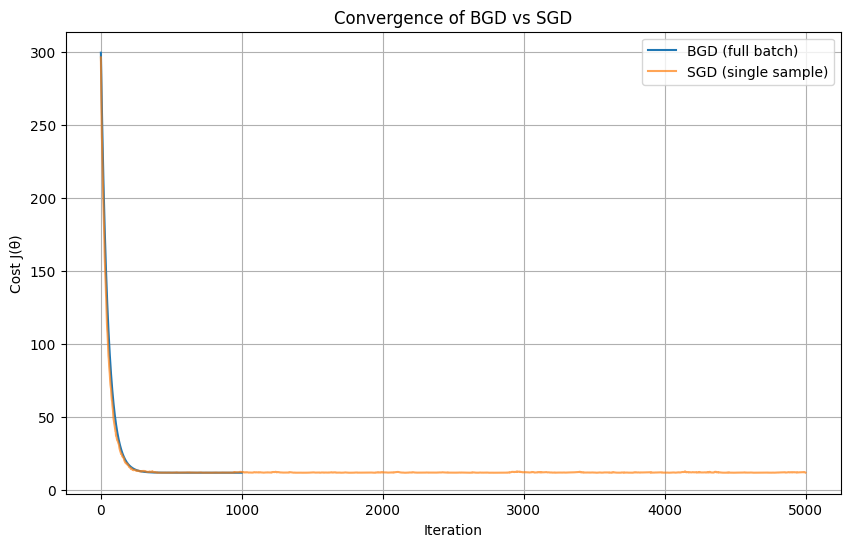

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(n_iterations_bgd), cost_history_bgd, label='BGD (full batch)')
plt.plot(range(n_iterations_sgd), cost_history_sgd, label='SGD (single sample)', alpha=0.7)
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.title("Convergence of BGD vs SGD")
plt.legend()
plt.grid(True)
plt.show()

# Section 3

A_poly_scaled (5 rows):
 [[1.         0.66413273 0.45997873]
 [1.         1.57459447 1.513418  ]
 [1.         1.18439658 1.03133562]
 [1.         1.18439658 1.03133562]
 [1.         0.92426466 0.73545438]]

SGD final θ (polynomial degree 2):
 [[ 23.52355681]
 [-11.55965193]
 [  5.88755693]]


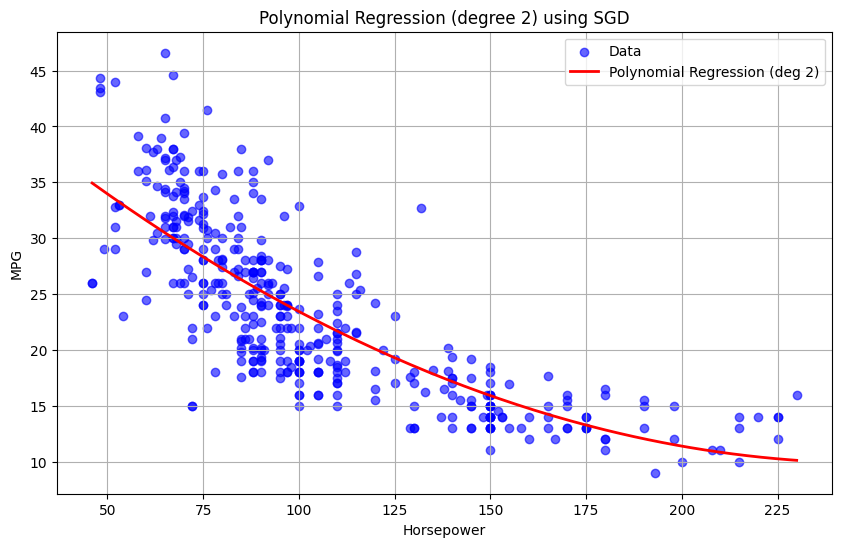

In [20]:
x = data_mpg['Horsepower'].values.reshape(-1,1)
y = data_mpg['MPG'].values.reshape(-1,1)
m = y.shape[0]


x_squared = x**2
A_poly = np.hstack([np.ones_like(x), x, x_squared])

scaler_poly = StandardScaler()
A_poly_scaled = A_poly.copy()
A_poly_scaled[:,1:3] = scaler_poly.fit_transform(A_poly[:,1:3])

print("A_poly_scaled (5 rows):\n", A_poly_scaled[:5])


theta_poly = np.zeros((3,1))
alpha = 0.01
n_iterations = 5000
cost_history_poly = []

for iter in range(n_iterations):
    i = np.random.randint(0, m)
    Ai = A_poly_scaled[i:i+1, :]  # shape (1,3)
    yi = y[i:i+1, :]              # shape (1,1)
    gradient = Ai.T @ (Ai @ theta_poly - yi)
    theta_poly = theta_poly - alpha * gradient
    cost_history_poly.append((1/(2*m)) * np.sum((A_poly_scaled @ theta_poly - y)**2))

print("\nSGD final θ (polynomial degree 2):\n", theta_poly)


x_plot = np.linspace(x.min(), x.max(), 200).reshape(-1,1)
x_plot_squared = x_plot**2
A_plot = np.hstack([np.ones_like(x_plot), x_plot, x_plot_squared])
A_plot[:,1:3] = scaler_poly.transform(A_plot[:,1:3])

y_plot = A_plot @ theta_poly

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', alpha=0.6, label='Data')
plt.plot(x_plot, y_plot, color='red', linewidth=2, label='Polynomial Regression (deg 2)')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression (degree 2) using SGD')
plt.legend()
plt.grid(True)
plt.show()
